<a href="https://colab.research.google.com/github/labibahanastu/MachineLearning_Assignment/blob/main/ML_Week14_Encoder_Decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Encoder Decoder

In [1]:
a=["affe","huhn"]
b=["atte","ratte","huhn"]

[i in a for i in b]

[False, False, True]

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as logit
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import roc_auc_score
import keras as ks
import tensorflow as tf
from scipy.special import erfinv
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import iplot
import math

import warnings
warnings.filterwarnings("ignore")

In [3]:
compresion = 3
eps = 100
bs = 2048
leRa = 0.02
dec = 0.0001

randRatioViz = 0.1

"Learning rate and decay ok?: " + str(leRa - dec * eps > 0)

'Learning rate and decay ok?: True'

In [5]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
train = pd.read_csv("input/train.csv")
train_id = train.id
test = pd.read_csv("input/test.csv")
test_id = test.id

In [8]:
Xx = pd.concat([train.drop("target", axis = 1), test])
Xx = Xx.set_index("id")
#Xx.dtypes

In [9]:
Xx.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915
1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452
3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960


In [10]:
catVars = [c for c in Xx.columns if "cat" in c]
contVars = [c for c in Xx.columns if "cont" in c]

In [11]:
le = preprocessing.LabelEncoder()
for c in catVars:
    Xx[f"{c}"] = le.fit_transform(Xx[f"{c}"])

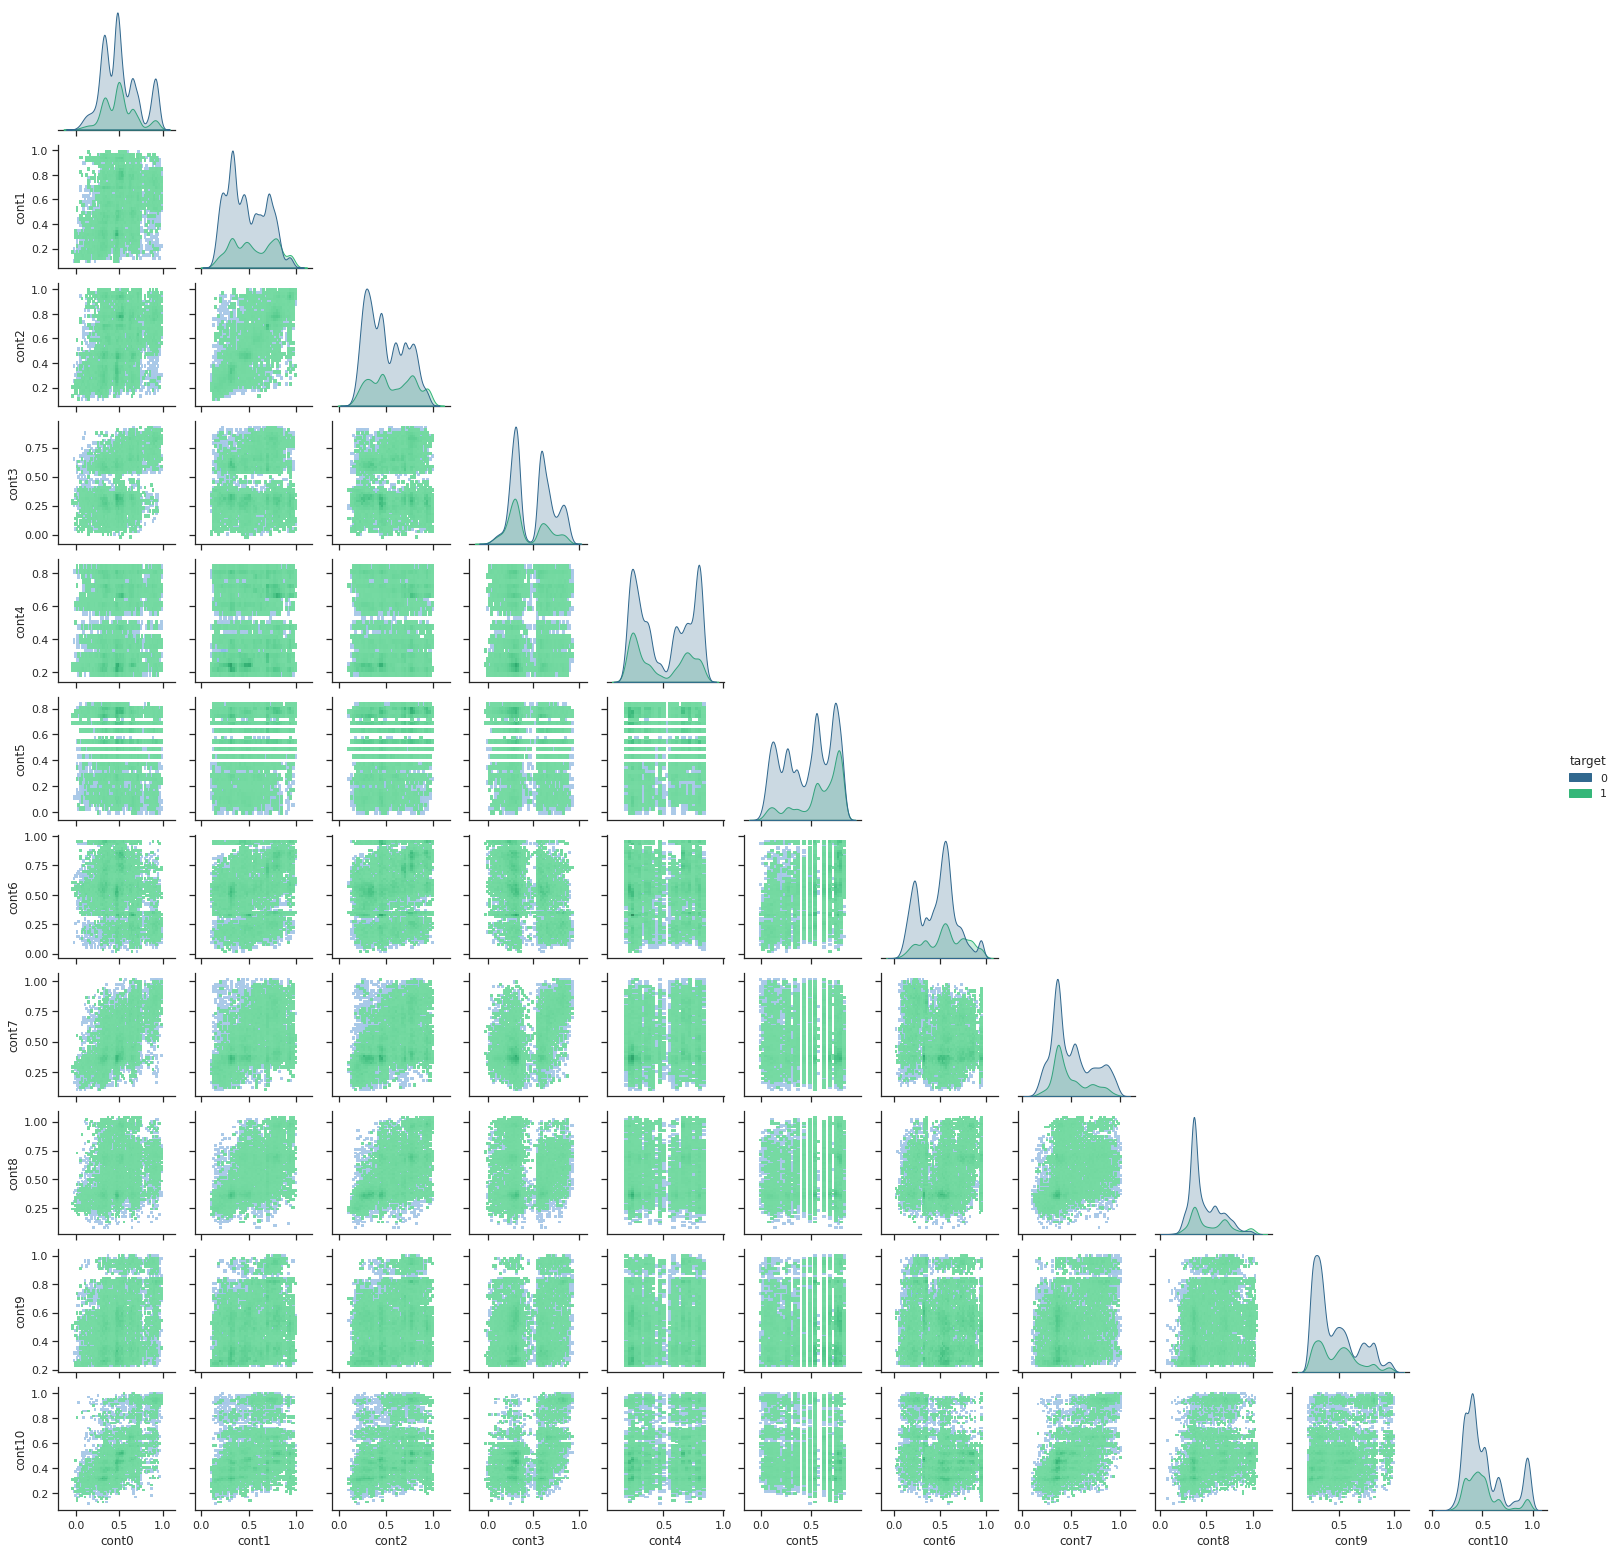

In [12]:
r = list(np.random.random_sample(train.shape[0]) <= randRatioViz)

df = train.loc[r,contVars]
df["target"] = train.loc[r,["target"]]

sns.set_theme(style="ticks")

sns.pairplot(df, 
             hue="target",
             palette ="viridis",
             kind="hist",
             height=2,
             diag_kind="kde",
             corner=True
             )

#fig = ff.create_scatterplotmatrix(df, 
#                                  diag='box', 
#                                  index='target',
#                                  colormap='Cividis',
#                                  colormap_type='cat',
#                                  height=900, width=900
#                                  )
#iplot(fig)